1)
Implement a class named NeuralNetwork with the following param-
eters during initialization:
(a) N: Number of layers in the network.
(b) A list of size N specifying the number of neurons in each layer.
(c) lr: Learning rate
(d) Activation function (same activation function is used in all layers of the network
except the last layer).
Page 2
(e) Weight initialization function.
(f) Number of epochs.
(g) Batch size.
The NeuralNetwork class should also implement the following functions:
(a) fit(X, Y): trains a model on input data X and labels Y.
(b) predict(X): gives the prediction for input X.
(c) predict_proba(X): gives the class-wise probability for input X.
(d) score(X, Y): gives the accuracy of the trained model on input X and labels Y.

In [ ]:
# import numpy as np
# import struct
# import pickle
# import os
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# # Neural Network Class
# class NeuralNetwork:
#     def __init__(self, N, layer_sizes, lr, activation_func, weight_init_func, epochs, batch_size):
#         self.N = N
#         self.layer_sizes = layer_sizes
#         self.lr = lr
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.activation_func = activation_func
#         self.weight_init_func = weight_init_func
        
#         # Initialize weights and biases
#         self.weights = [weight_init_func((layer_sizes[i-1], layer_sizes[i])) for i in range(1, N)]
#         self.biases = [np.zeros((1, layer_sizes[i])) for i in range(1, N)]
    
#     def forward(self, X):
#         self.a = [X]
#         self.z = []
        
#         for i in range(self.N - 1):
#             z = self.a[-1] @ self.weights[i] + self.biases[i]
#             self.z.append(z)
            
#             if i == self.N - 2:  # Output layer
#                 a = ActivationFunctions.softmax(z)
#             else:
#                 a = self.activation_func(z)
                
#             self.a.append(a)
        
#         return self.a[-1]
    
#     def backward(self, X, Y):
#         m = X.shape[0]
#         grads_w = [None] * (self.N - 1)
#         grads_b = [None] * (self.N - 1)
        
#         dz = self.a[-1] - Y
#         for i in reversed(range(self.N - 1)):
#             grads_w[i] = (self.a[i].T @ dz) / m
#             grads_b[i] = np.sum(dz, axis=0, keepdims=True) / m
            
#             if i != 0:
#                 da = dz @ self.weights[i].T
#                 dz = da * ActivationFunctions.relu_derivative(self.z[i-1])
        
#         return grads_w, grads_b
    
#     def update_weights(self, grads_w, grads_b):
#         for i in range(self.N - 1):
#             self.weights[i] -= self.lr * grads_w[i]
#             self.biases[i] -= self.lr * grads_b[i]
    
#     def fit(self, X, Y, early_stopping=False, patience=10):
#         Y_one_hot = np.eye(self.layer_sizes[-1])[Y]
#         X_train, X_val, Y_train, Y_val = train_test_split(X, Y_one_hot, test_size=0.1)
#         train_losses = []
#         val_losses = []
#         best_val_loss = float("inf")
#         wait = 0

#         for epoch in range(self.epochs):
#             for i in range(0, X_train.shape[0], self.batch_size):
#                 X_batch = X_train[i:i + self.batch_size]
#                 Y_batch = Y_train[i:i + self.batch_size]
                
#                 self.forward(X_batch)
#                 grads_w, grads_b = self.backward(X_batch, Y_batch)
#                 self.update_weights(grads_w, grads_b)
            
#             # Calculate and store train and validation loss
#             train_loss = -np.sum(Y_train * np.log(self.forward(X_train))) / X_train.shape[0]
#             val_loss = -np.sum(Y_val * np.log(self.forward(X_val))) / X_val.shape[0]
#             train_losses.append(train_loss)
#             val_losses.append(val_loss)
            
#             if early_stopping:
#                 if val_loss < best_val_loss:
#                     best_val_loss = val_loss
#                     wait = 0
#                 else:
#                     wait += 1
#                     if wait >= patience:
#                         print(f"Early stopping at epoch {epoch+1}")
#                         break
            
#             print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
#         # Plot training and validation loss vs. epochs
#         plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
#         plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
#         plt.xlabel("Epochs")
#         plt.ylabel("Loss")
#         plt.legend()
#         plt.title("Loss vs. Epochs")
#         plt.show()

#     def predict_proba(self, X):
#         return self.forward(X)
        
#     def predict(self, X):
#         return np.argmax(self.predict_proba(X), axis=1)
        
#     def score(self, X, Y):
#         Y_pred = self.predict(X)
#         return accuracy_score(Y, Y_pred)


2)
(2 points) Implement the following activation functions (along with their gradient
functions): sigmoid, tanh, ReLU, Leaky ReLU and softmax (only used in the last
layer)

In [ ]:
# # Activation Functions Class
# class ActivationFunctions:
#     @staticmethod
#     def sigmoid(x):
#         return 1 / (1 + np.exp(-x))
    
#     @staticmethod
#     def sigmoid_derivative(x):
#         s = ActivationFunctions.sigmoid(x)
#         return s * (1 - s)
    
#     @staticmethod
#     def tanh(x):
#         return np.tanh(x)
    
#     @staticmethod
#     def tanh_derivative(x):
#         return 1 - np.tanh(x) ** 2
    
#     @staticmethod
#     def relu(x):
#         return np.maximum(0, x)
    
#     @staticmethod
#     def relu_derivative(x):
#         return np.where(x > 0, 1, 0)
    
#     @staticmethod
#     def leaky_relu(x, alpha=0.01):
#         return np.where(x > 0, x, alpha * x)
    
#     @staticmethod
#     def leaky_relu_derivative(x, alpha=0.01):
#         return np.where(x > 0, 1, alpha)
    
#     @staticmethod
#     def softmax(x):
#         exps = np.exp(x - np.max(x, axis=1, keepdims=True))
#         return exps / np.sum(exps, axis=1, keepdims=True)


3)
(1.5 points) Implement the following weight initialization functions: zero init, ran-
dom init, and normal init (Normal(0, 1)). Choose appropriate scaling factors

In [ ]:
# # Weight Initializations Class
# class WeightInitializations:
#     @staticmethod
#     def zero_init(shape):
#         return np.zeros(shape)
    
#     @staticmethod
#     def random_init(shape):
#         return np.random.rand(*shape) * 0.01  # Small random values for stability
    
#     @staticmethod
#     def normal_init(shape):
#         return np.random.randn(*shape) * np.sqrt(2 / shape[0])  # initialization for better convergence


4)
(6 points) Train the implemented network on the MNIST dataset. Perform appro-
priate preprocessing and use a 80:10:10 train-validation-test split. Use the following
configurations for training the network:
(a) Number of hidden layers = 4.
(b) Layer sizes = [256,128,64,32].
(c) Number of epochs = 100 (can be less if computation is taking too long).
(d) Batch size = 128 (or any other appropriate batch size if taking too long).
(e) Learning rate = 2e-5.
Plot training loss vs. epochs and validation loss vs. epochs for each activation
function and weight initialization function and report your findings in the report
(such as which function combination performed the best and where did it perform
suboptimally).
Also, save all the 12 trained models as .pkl files. You will be asked to run
them during the demo to reproduce your results on the test set.

# Early stopping 

Training model with relu and zero_init
Epoch 1/100, Train Loss: 2.3024, Val Loss: 2.3023
Epoch 2/100, Train Loss: 2.3022, Val Loss: 2.3021
Epoch 3/100, Train Loss: 2.3020, Val Loss: 2.3019
Epoch 4/100, Train Loss: 2.3019, Val Loss: 2.3017
Epoch 5/100, Train Loss: 2.3018, Val Loss: 2.3015
Epoch 6/100, Train Loss: 2.3017, Val Loss: 2.3014
Epoch 7/100, Train Loss: 2.3016, Val Loss: 2.3013
Epoch 8/100, Train Loss: 2.3016, Val Loss: 2.3012
Epoch 9/100, Train Loss: 2.3015, Val Loss: 2.3011
Epoch 10/100, Train Loss: 2.3015, Val Loss: 2.3010
Epoch 11/100, Train Loss: 2.3014, Val Loss: 2.3010
Epoch 12/100, Train Loss: 2.3014, Val Loss: 2.3009
Epoch 13/100, Train Loss: 2.3014, Val Loss: 2.3009
Epoch 14/100, Train Loss: 2.3014, Val Loss: 2.3008
Epoch 15/100, Train Loss: 2.3013, Val Loss: 2.3008
Epoch 16/100, Train Loss: 2.3013, Val Loss: 2.3007
Epoch 17/100, Train Loss: 2.3013, Val Loss: 2.3007
Epoch 18/100, Train Loss: 2.3013, Val Loss: 2.3007
Epoch 19/100, Train Loss: 2.3013, Val Loss: 2.3007
E

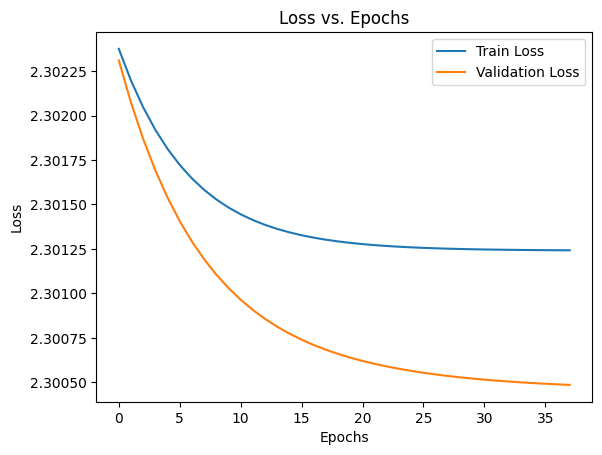

Model saved as model/relu_zero_init.pkl
Training model with relu and random_init
Epoch 1/100, Train Loss: 2.2892, Val Loss: 2.2902
Epoch 2/100, Train Loss: 2.2846, Val Loss: 2.2859
Epoch 3/100, Train Loss: 2.2808, Val Loss: 2.2820
Epoch 4/100, Train Loss: 2.2768, Val Loss: 2.2778
Epoch 5/100, Train Loss: 2.2723, Val Loss: 2.2732
Epoch 6/100, Train Loss: 2.2674, Val Loss: 2.2681
Epoch 7/100, Train Loss: 2.2620, Val Loss: 2.2624
Epoch 8/100, Train Loss: 2.2559, Val Loss: 2.2561
Epoch 9/100, Train Loss: 2.2490, Val Loss: 2.2489
Epoch 10/100, Train Loss: 2.2411, Val Loss: 2.2406
Epoch 11/100, Train Loss: 2.2320, Val Loss: 2.2311
Epoch 12/100, Train Loss: 2.2212, Val Loss: 2.2198
Epoch 13/100, Train Loss: 2.2083, Val Loss: 2.2063
Epoch 14/100, Train Loss: 2.1924, Val Loss: 2.1897
Epoch 15/100, Train Loss: 2.1725, Val Loss: 2.1688
Epoch 16/100, Train Loss: 2.1495, Val Loss: 2.1447
Epoch 17/100, Train Loss: 2.1273, Val Loss: 2.1216
Epoch 18/100, Train Loss: 2.1068, Val Loss: 2.1003
Epoch 19/1

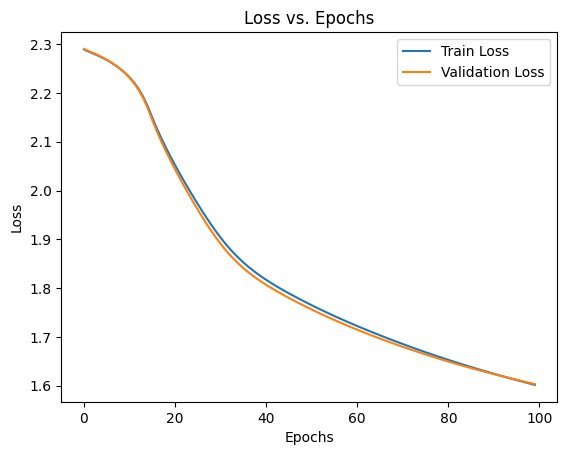

Model saved as model/relu_random_init.pkl
Training model with relu and normal_init
Epoch 1/100, Train Loss: 1.5915, Val Loss: 1.5896
Epoch 2/100, Train Loss: 1.0023, Val Loss: 1.0072
Epoch 3/100, Train Loss: 0.7150, Val Loss: 0.7222
Epoch 4/100, Train Loss: 0.5774, Val Loss: 0.5841
Epoch 5/100, Train Loss: 0.4998, Val Loss: 0.5055
Epoch 6/100, Train Loss: 0.4501, Val Loss: 0.4550
Epoch 7/100, Train Loss: 0.4153, Val Loss: 0.4197
Epoch 8/100, Train Loss: 0.3893, Val Loss: 0.3933
Epoch 9/100, Train Loss: 0.3690, Val Loss: 0.3727
Epoch 10/100, Train Loss: 0.3525, Val Loss: 0.3561
Epoch 11/100, Train Loss: 0.3387, Val Loss: 0.3423
Epoch 12/100, Train Loss: 0.3269, Val Loss: 0.3306
Epoch 13/100, Train Loss: 0.3166, Val Loss: 0.3205
Epoch 14/100, Train Loss: 0.3075, Val Loss: 0.3117
Epoch 15/100, Train Loss: 0.2993, Val Loss: 0.3038
Epoch 16/100, Train Loss: 0.2918, Val Loss: 0.2967
Epoch 17/100, Train Loss: 0.2850, Val Loss: 0.2902
Epoch 18/100, Train Loss: 0.2787, Val Loss: 0.2842
Epoch 19

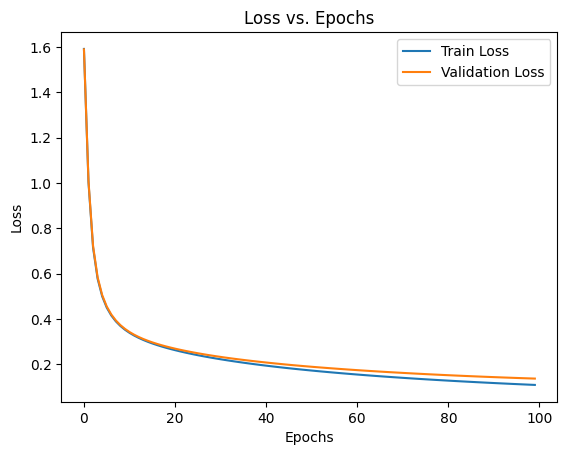

Model saved as model/relu_normal_init.pkl
Training model with sigmoid and zero_init
Epoch 1/100, Train Loss: 2.3011, Val Loss: 2.3019
Epoch 2/100, Train Loss: 2.3011, Val Loss: 2.3020
Epoch 3/100, Train Loss: 2.3011, Val Loss: 2.3020
Epoch 4/100, Train Loss: 2.3011, Val Loss: 2.3020
Epoch 5/100, Train Loss: 2.3011, Val Loss: 2.3020
Epoch 6/100, Train Loss: 2.3011, Val Loss: 2.3021
Epoch 7/100, Train Loss: 2.3011, Val Loss: 2.3021
Epoch 8/100, Train Loss: 2.3011, Val Loss: 2.3021
Epoch 9/100, Train Loss: 2.3011, Val Loss: 2.3021
Epoch 10/100, Train Loss: 2.3011, Val Loss: 2.3021
Early stopping at epoch 11


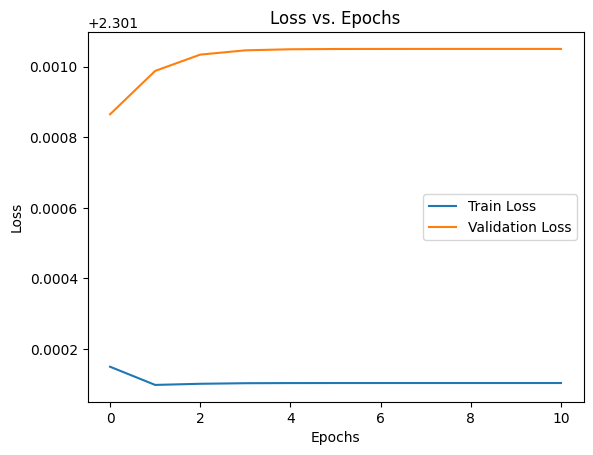

Model saved as model/sigmoid_zero_init.pkl
Training model with sigmoid and random_init
Epoch 1/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 2/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 3/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 4/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 5/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 6/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 7/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 8/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 9/100, Train Loss: 2.3012, Val Loss: 2.3017
Epoch 10/100, Train Loss: 2.3012, Val Loss: 2.3017
Early stopping at epoch 11


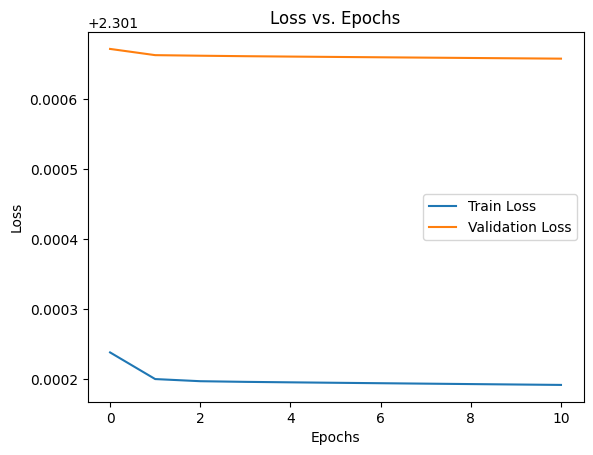

Model saved as model/sigmoid_random_init.pkl
Training model with sigmoid and normal_init
Epoch 1/100, Train Loss: 2.2884, Val Loss: 2.2882
Epoch 2/100, Train Loss: 2.2674, Val Loss: 2.2672
Epoch 3/100, Train Loss: 2.2436, Val Loss: 2.2435
Epoch 4/100, Train Loss: 2.2162, Val Loss: 2.2164
Epoch 5/100, Train Loss: 2.1889, Val Loss: 2.1895
Epoch 6/100, Train Loss: 2.1670, Val Loss: 2.1678
Epoch 7/100, Train Loss: 2.1526, Val Loss: 2.1536
Epoch 8/100, Train Loss: 2.1463, Val Loss: 2.1476
Epoch 9/100, Train Loss: 2.1455, Val Loss: 2.1470
Epoch 10/100, Train Loss: 2.1460, Val Loss: 2.1477
Epoch 11/100, Train Loss: 2.1433, Val Loss: 2.1452
Epoch 12/100, Train Loss: 2.1366, Val Loss: 2.1389
Epoch 13/100, Train Loss: 2.1257, Val Loss: 2.1282
Epoch 14/100, Train Loss: 2.1145, Val Loss: 2.1171
Epoch 15/100, Train Loss: 2.1023, Val Loss: 2.1054
Epoch 16/100, Train Loss: 2.0903, Val Loss: 2.0935
Epoch 17/100, Train Loss: 2.0788, Val Loss: 2.0823
Epoch 18/100, Train Loss: 2.0678, Val Loss: 2.0715
Ep

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_5180\1334243223.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 42/100, Train Loss: 1.9550, Val Loss: 1.9633
Epoch 43/100, Train Loss: 1.9511, Val Loss: 1.9597
Epoch 44/100, Train Loss: 1.9474, Val Loss: 1.9547
Epoch 45/100, Train Loss: 1.9432, Val Loss: 1.9509
Epoch 46/100, Train Loss: 1.9393, Val Loss: 1.9489
Epoch 47/100, Train Loss: 1.9353, Val Loss: 1.9455
Epoch 48/100, Train Loss: 1.9321, Val Loss: 1.9409
Epoch 49/100, Train Loss: 1.9296, Val Loss: 1.9365
Epoch 50/100, Train Loss: 1.9277, Val Loss: 1.9364
Epoch 51/100, Train Loss: 1.9260, Val Loss: 1.9374
Epoch 52/100, Train Loss: 1.9249, Val Loss: 1.9360
Epoch 53/100, Train Loss: 1.9240, Val Loss: 1.9362
Epoch 54/100, Train Loss: 1.9225, Val Loss: 1.9341
Epoch 55/100, Train Loss: 1.9211, Val Loss: 1.9341
Epoch 56/100, Train Loss: 1.9193, Val Loss: 1.9312
Epoch 57/100, Train Loss: 1.9175, Val Loss: 1.9269
Epoch 58/100, Train Loss: 1.9162, Val Loss: 1.9257
Epoch 59/100, Train Loss: 1.9139, Val Loss: 1.9235
Epoch 60/100, Train Loss: 1.9113, Val Loss: 1.9189
Epoch 61/100, Train Loss: 1.908

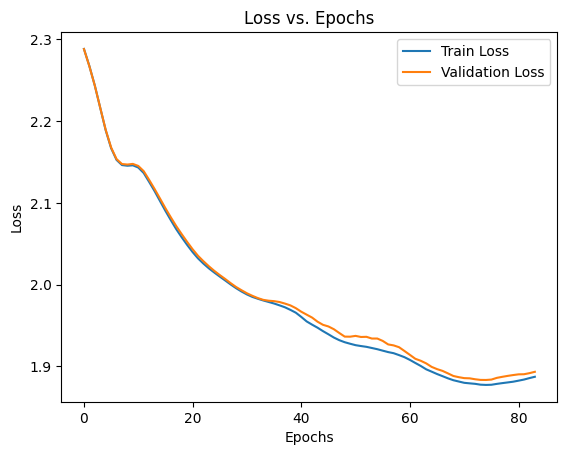

Model saved as model/sigmoid_normal_init.pkl
Training model with tanh and zero_init
Epoch 1/100, Train Loss: 2.3023, Val Loss: 2.3024
Epoch 2/100, Train Loss: 2.3021, Val Loss: 2.3023
Epoch 3/100, Train Loss: 2.3020, Val Loss: 2.3022
Epoch 4/100, Train Loss: 2.3018, Val Loss: 2.3021
Epoch 5/100, Train Loss: 2.3017, Val Loss: 2.3020
Epoch 6/100, Train Loss: 2.3016, Val Loss: 2.3020
Epoch 7/100, Train Loss: 2.3015, Val Loss: 2.3020
Epoch 8/100, Train Loss: 2.3015, Val Loss: 2.3019
Epoch 9/100, Train Loss: 2.3014, Val Loss: 2.3019
Epoch 10/100, Train Loss: 2.3013, Val Loss: 2.3019
Epoch 11/100, Train Loss: 2.3013, Val Loss: 2.3019
Epoch 12/100, Train Loss: 2.3013, Val Loss: 2.3019
Epoch 13/100, Train Loss: 2.3012, Val Loss: 2.3019
Epoch 14/100, Train Loss: 2.3012, Val Loss: 2.3019
Epoch 15/100, Train Loss: 2.3012, Val Loss: 2.3019
Epoch 16/100, Train Loss: 2.3012, Val Loss: 2.3019
Epoch 17/100, Train Loss: 2.3012, Val Loss: 2.3019
Early stopping at epoch 18


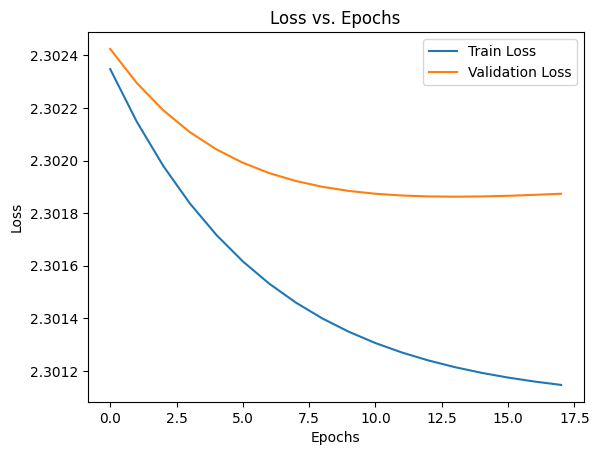

Model saved as model/tanh_zero_init.pkl
Training model with tanh and random_init
Epoch 1/100, Train Loss: 2.2982, Val Loss: 2.2981
Epoch 2/100, Train Loss: 2.2959, Val Loss: 2.2959
Epoch 3/100, Train Loss: 2.2942, Val Loss: 2.2942
Epoch 4/100, Train Loss: 2.2925, Val Loss: 2.2925
Epoch 5/100, Train Loss: 2.2907, Val Loss: 2.2907
Epoch 6/100, Train Loss: 2.2888, Val Loss: 2.2888
Epoch 7/100, Train Loss: 2.2868, Val Loss: 2.2868
Epoch 8/100, Train Loss: 2.2845, Val Loss: 2.2845
Epoch 9/100, Train Loss: 2.2820, Val Loss: 2.2820
Epoch 10/100, Train Loss: 2.2792, Val Loss: 2.2793
Epoch 11/100, Train Loss: 2.2761, Val Loss: 2.2762
Epoch 12/100, Train Loss: 2.2726, Val Loss: 2.2726
Epoch 13/100, Train Loss: 2.2685, Val Loss: 2.2686
Epoch 14/100, Train Loss: 2.2638, Val Loss: 2.2638
Epoch 15/100, Train Loss: 2.2580, Val Loss: 2.2582
Epoch 16/100, Train Loss: 2.2510, Val Loss: 2.2512
Epoch 17/100, Train Loss: 2.2422, Val Loss: 2.2425
Epoch 18/100, Train Loss: 2.2305, Val Loss: 2.2309
Epoch 19/1

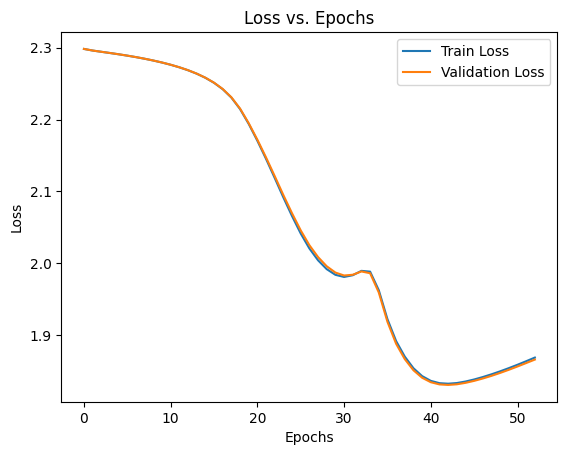

Model saved as model/tanh_random_init.pkl
Training model with tanh and normal_init
Epoch 1/100, Train Loss: 1.6515, Val Loss: 1.6585
Epoch 2/100, Train Loss: 1.3748, Val Loss: 1.3834
Epoch 3/100, Train Loss: 1.2866, Val Loss: 1.2948
Epoch 4/100, Train Loss: 1.2673, Val Loss: 1.2738
Epoch 5/100, Train Loss: 1.2536, Val Loss: 1.2596
Epoch 6/100, Train Loss: 1.2431, Val Loss: 1.2485
Epoch 7/100, Train Loss: 1.2491, Val Loss: 1.2523
Epoch 8/100, Train Loss: 1.2595, Val Loss: 1.2613
Epoch 9/100, Train Loss: 1.2701, Val Loss: 1.2718
Epoch 10/100, Train Loss: 1.2595, Val Loss: 1.2620
Epoch 11/100, Train Loss: 1.2408, Val Loss: 1.2430
Epoch 12/100, Train Loss: 1.2155, Val Loss: 1.2169
Epoch 13/100, Train Loss: 1.1832, Val Loss: 1.1841
Epoch 14/100, Train Loss: 1.1570, Val Loss: 1.1575
Epoch 15/100, Train Loss: 1.1320, Val Loss: 1.1328
Epoch 16/100, Train Loss: 1.1151, Val Loss: 1.1166
Epoch 17/100, Train Loss: 1.0999, Val Loss: 1.1017
Epoch 18/100, Train Loss: 1.0848, Val Loss: 1.0863
Epoch 19

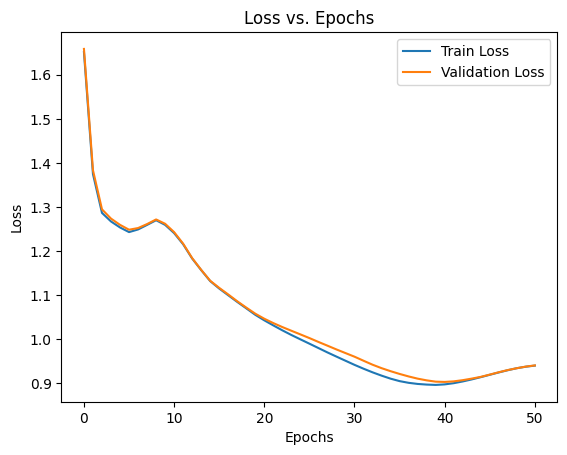

Model saved as model/tanh_normal_init.pkl
Training model with leaky_relu and zero_init
Epoch 1/100, Train Loss: 2.3024, Val Loss: 2.3023
Epoch 2/100, Train Loss: 2.3022, Val Loss: 2.3021
Epoch 3/100, Train Loss: 2.3021, Val Loss: 2.3019
Epoch 4/100, Train Loss: 2.3019, Val Loss: 2.3017
Epoch 5/100, Train Loss: 2.3018, Val Loss: 2.3015
Epoch 6/100, Train Loss: 2.3017, Val Loss: 2.3014
Epoch 7/100, Train Loss: 2.3017, Val Loss: 2.3013
Epoch 8/100, Train Loss: 2.3016, Val Loss: 2.3012
Epoch 9/100, Train Loss: 2.3015, Val Loss: 2.3011
Epoch 10/100, Train Loss: 2.3015, Val Loss: 2.3010
Epoch 11/100, Train Loss: 2.3015, Val Loss: 2.3009
Epoch 12/100, Train Loss: 2.3014, Val Loss: 2.3009
Epoch 13/100, Train Loss: 2.3014, Val Loss: 2.3008
Epoch 14/100, Train Loss: 2.3014, Val Loss: 2.3008
Epoch 15/100, Train Loss: 2.3014, Val Loss: 2.3007
Epoch 16/100, Train Loss: 2.3013, Val Loss: 2.3007
Epoch 17/100, Train Loss: 2.3013, Val Loss: 2.3007
Epoch 18/100, Train Loss: 2.3013, Val Loss: 2.3006
Epoc

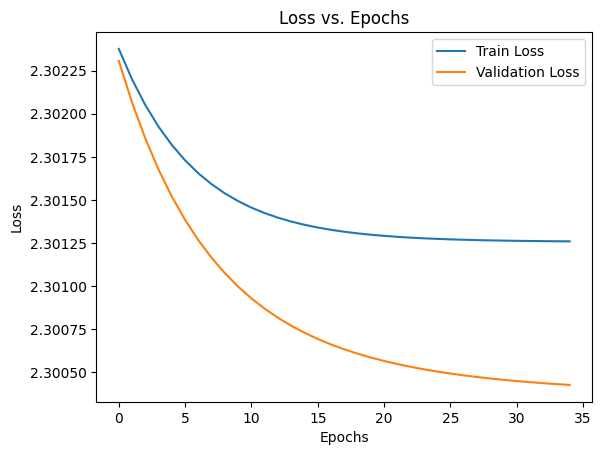

Model saved as model/leaky_relu_zero_init.pkl
Training model with leaky_relu and random_init
Epoch 1/100, Train Loss: 2.2889, Val Loss: 2.2913
Epoch 2/100, Train Loss: 2.2845, Val Loss: 2.2876
Epoch 3/100, Train Loss: 2.2807, Val Loss: 2.2841
Epoch 4/100, Train Loss: 2.2766, Val Loss: 2.2801
Epoch 5/100, Train Loss: 2.2722, Val Loss: 2.2758
Epoch 6/100, Train Loss: 2.2673, Val Loss: 2.2710
Epoch 7/100, Train Loss: 2.2618, Val Loss: 2.2657
Epoch 8/100, Train Loss: 2.2558, Val Loss: 2.2598
Epoch 9/100, Train Loss: 2.2489, Val Loss: 2.2530
Epoch 10/100, Train Loss: 2.2410, Val Loss: 2.2453
Epoch 11/100, Train Loss: 2.2319, Val Loss: 2.2363
Epoch 12/100, Train Loss: 2.2212, Val Loss: 2.2257
Epoch 13/100, Train Loss: 2.2083, Val Loss: 2.2131
Epoch 14/100, Train Loss: 2.1926, Val Loss: 2.1975
Epoch 15/100, Train Loss: 2.1727, Val Loss: 2.1778
Epoch 16/100, Train Loss: 2.1495, Val Loss: 2.1548
Epoch 17/100, Train Loss: 2.1269, Val Loss: 2.1324
Epoch 18/100, Train Loss: 2.1062, Val Loss: 2.111

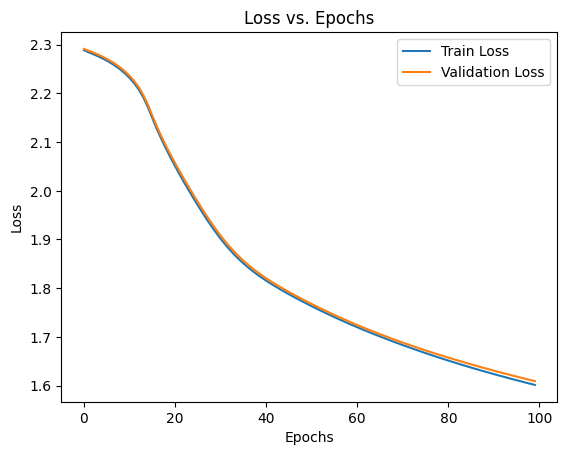

Model saved as model/leaky_relu_random_init.pkl
Training model with leaky_relu and normal_init
Epoch 1/100, Train Loss: 1.5985, Val Loss: 1.5952
Epoch 2/100, Train Loss: 0.9719, Val Loss: 0.9590
Epoch 3/100, Train Loss: 0.6903, Val Loss: 0.6742
Epoch 4/100, Train Loss: 0.5579, Val Loss: 0.5420
Epoch 5/100, Train Loss: 0.4834, Val Loss: 0.4687
Epoch 6/100, Train Loss: 0.4359, Val Loss: 0.4226
Epoch 7/100, Train Loss: 0.4027, Val Loss: 0.3910
Epoch 8/100, Train Loss: 0.3780, Val Loss: 0.3679
Epoch 9/100, Train Loss: 0.3588, Val Loss: 0.3501
Epoch 10/100, Train Loss: 0.3432, Val Loss: 0.3358
Epoch 11/100, Train Loss: 0.3303, Val Loss: 0.3241
Epoch 12/100, Train Loss: 0.3192, Val Loss: 0.3140
Epoch 13/100, Train Loss: 0.3094, Val Loss: 0.3053
Epoch 14/100, Train Loss: 0.3008, Val Loss: 0.2976
Epoch 15/100, Train Loss: 0.2930, Val Loss: 0.2906
Epoch 16/100, Train Loss: 0.2859, Val Loss: 0.2843
Epoch 17/100, Train Loss: 0.2794, Val Loss: 0.2786
Epoch 18/100, Train Loss: 0.2734, Val Loss: 0.2

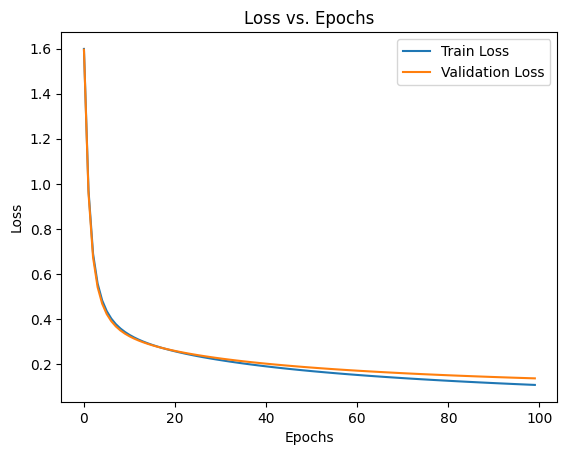

Model saved as model/leaky_relu_normal_init.pkl


In [15]:
import numpy as np
import struct
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Activation Functions Class
class ActivationFunctions:
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def sigmoid_derivative(x):
        s = ActivationFunctions.sigmoid(x)
        return s * (1 - s)
    
    @staticmethod
    def tanh(x):
        return np.tanh(x)
    
    @staticmethod
    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2
    
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    @staticmethod
    def relu_derivative(x):
        return np.where(x > 0, 1, 0)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        return np.where(x > 0, x, alpha * x)
    
    @staticmethod
    def leaky_relu_derivative(x, alpha=0.01):
        return np.where(x > 0, 1, alpha)
    
    @staticmethod
    def softmax(x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

# Weight Initializations Class
class WeightInitializations:
    @staticmethod
    def zero_init(shape):
        return np.zeros(shape)
    
    @staticmethod
    def random_init(shape):
        return np.random.rand(*shape) * 0.01  # Small random values for stability
    
    @staticmethod
    def normal_init(shape):
        return np.random.randn(*shape) * np.sqrt(2 / shape[0])  # He initialization for better convergence

# Neural Network Class
class NeuralNetwork:
    def __init__(self, N, layer_sizes, lr, activation_func, weight_init_func, epochs, batch_size):
        self.N = N
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.activation_func = activation_func
        self.weight_init_func = weight_init_func
        
        # Initialize weights and biases
        self.weights = [weight_init_func((layer_sizes[i-1], layer_sizes[i])) for i in range(1, N)]
        self.biases = [np.zeros((1, layer_sizes[i])) for i in range(1, N)]
    
    def forward(self, X):
        self.a = [X]
        self.z = []
        
        for i in range(self.N - 1):
            z = self.a[-1] @ self.weights[i] + self.biases[i]
            self.z.append(z)
            
            if i == self.N - 2:  # Output layer
                a = ActivationFunctions.softmax(z)
            else:
                a = self.activation_func(z)
                
            self.a.append(a)
        
        return self.a[-1]
    
    def backward(self, X, Y):
        m = X.shape[0]
        grads_w = [None] * (self.N - 1)
        grads_b = [None] * (self.N - 1)
        
        dz = self.a[-1] - Y
        for i in reversed(range(self.N - 1)):
            grads_w[i] = (self.a[i].T @ dz) / m
            grads_b[i] = np.sum(dz, axis=0, keepdims=True) / m
            
            if i != 0:
                da = dz @ self.weights[i].T
                dz = da * ActivationFunctions.relu_derivative(self.z[i-1])
        
        return grads_w, grads_b
    
    def update_weights(self, grads_w, grads_b):
        for i in range(self.N - 1):
            self.weights[i] -= self.lr * grads_w[i]
            self.biases[i] -= self.lr * grads_b[i]
    
    def fit(self, X, Y, early_stopping=False, patience=10):
        Y_one_hot = np.eye(self.layer_sizes[-1])[Y]
        X_train, X_val, Y_train, Y_val = train_test_split(X, Y_one_hot, test_size=0.1)
        train_losses = []
        val_losses = []
        best_val_loss = float("inf")
        wait = 0

        for epoch in range(self.epochs):
            for i in range(0, X_train.shape[0], self.batch_size):
                X_batch = X_train[i:i + self.batch_size]
                Y_batch = Y_train[i:i + self.batch_size]
                
                self.forward(X_batch)
                grads_w, grads_b = self.backward(X_batch, Y_batch)
                self.update_weights(grads_w, grads_b)
            
            # Calculate and store train and validation loss
            train_loss = -np.sum(Y_train * np.log(self.forward(X_train))) / X_train.shape[0]
            val_loss = -np.sum(Y_val * np.log(self.forward(X_val))) / X_val.shape[0]
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            
            if early_stopping:
                if val_loss < best_val_loss- 1e-4:
                    best_val_loss = val_loss
                    wait = 0
                else:
                    wait += 1
                    if wait >= patience:
                        print(f"Early stopping at epoch {epoch+1}")
                        break
            
            print(f"Epoch {epoch+1}/{self.epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        # Plot training and validation loss vs. epochs
        plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
        plt.plot(range(len(val_losses)), val_losses, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.title("Loss vs. Epochs")
        plt.show()

    def predict_proba(self, X):
        return self.forward(X)
        
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)
        
    def score(self, X, Y):
        Y_pred = self.predict(X)
        return accuracy_score(Y, Y_pred)
    
    # Save the model to a file using pickle
    def save_model(self, filepath):
        with open(filepath, 'wb') as f:
            pickle.dump(self, f)
    
    # Load the model from a pickle file
    @staticmethod
    def load_model(filepath):
        with open(filepath, 'rb') as f:
            model = pickle.load(f)
        return model

# Helper Functions to Load Data
def load_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows * cols)
    return images / 255.0  # Normalize to [0, 1]

def load_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Load MNIST Data
train_images = load_images('archive/train-images.idx3-ubyte')
train_labels = load_labels('archive/train-labels.idx1-ubyte')
test_images = load_images('archive/t10k-images.idx3-ubyte')
test_labels = load_labels('archive/t10k-labels.idx1-ubyte')

# Define activation functions and weight initializations
activation_funcs = [
    ActivationFunctions.relu,
    ActivationFunctions.sigmoid,
    ActivationFunctions.tanh,
    ActivationFunctions.leaky_relu
]

weight_init_funcs = [
    WeightInitializations.zero_init,
    WeightInitializations.random_init,
    WeightInitializations.normal_init
]

# Create directory to save models
os.makedirs('model', exist_ok=True)


# Create directory to save models
os.makedirs('model', exist_ok=True)

# Train and save 12 models with different combinations of activation functions and weight initializations
for activation_func in activation_funcs:
    for weight_init_func in weight_init_funcs:
        # Create a neural network model
        nn = NeuralNetwork(
            N=5,  # 4 layers + output layer
            layer_sizes=[784, 256, 128, 64, 10],
            lr=2e-3,
            activation_func=activation_func,
            weight_init_func=weight_init_func,
            epochs=100,  # You can adjust the number of epochs
            batch_size=128
        )
        
        # Define the filename based on activation function and weight initialization
        model_filename = f"model/{activation_func.__name__}_{weight_init_func.__name__}.pkl"
        
        # Print the training info
        print(f"Training model with {activation_func.__name__} and {weight_init_func.__name__}")
        
        # Train the model
        # nn.fit(train_images, train_labels)
        nn.fit(train_images, train_labels, early_stopping=True, patience=10)

        
        # Save the model with the defined filename
        nn.save_model(model_filename)
        print(f"Model saved as {model_filename}")


In [17]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Ignore UndefinedMetricWarning
warnings.simplefilter('ignore', UndefinedMetricWarning)


In [18]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os

# Load the test data (ensure you have already loaded the test data in previous steps)
test_images = load_images('archive/t10k-images.idx3-ubyte')
test_labels = load_labels('archive/t10k-labels.idx1-ubyte')

# List all model files in the 'model_stop' directory
model_files = [f for f in os.listdir('model') if f.endswith('.pkl')]

# Iterate over each model and evaluate
for model_file in model_files:
    # Load the model from the pickle file
    model_filepath = os.path.join('model', model_file)
    with open(model_filepath, 'rb') as f:
        nn = pickle.load(f)
    
    # Print which model is being evaluated
    print(f"Evaluating model: {model_file}")
    
    # Make predictions on the test set
    y_pred = nn.predict(test_images)
    
    # Calculate accuracy and generate the classification report and confusion matrix
    test_accuracy = accuracy_score(test_labels, y_pred)
    print(f"Test Accuracy for {model_file}: {test_accuracy * 100:.2f}%")
    
    # Print Classification Report and Confusion Matrix
    print("Classification Report:\n", classification_report(test_labels, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(test_labels, y_pred))
    
    # Optionally, visualize some of the predictions
    # for i in range(5):  # Display the first 5 test images
    #     plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    #     plt.title(f"True: {test_labels[i]}, Pred: {y_pred[i]}")
    #     plt.show()


Evaluating model: leaky_relu_normal_init.pkl
Test Accuracy for leaky_relu_normal_init.pkl: 96.15%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.96      1032
           3       0.94      0.96      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.96       958
           7       0.97      0.96      0.96      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion Matrix:
 [[ 964    0    2    2    0    4    6    1    1    0]
 [   0 1118    3    2    0    1    3    2    6 

C:\Users\Himanshu\AppData\Local\Temp\ipykernel_5180\1334243223.py:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Evaluating model: sigmoid_random_init.pkl
Test Accuracy for sigmoid_random_init.pkl: 11.35%
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000

Confusion Matrix:
 [[   0  980    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]


Best Performing Model: The model using ReLU with normal initialization (relu_normal_init.pkl) is the most effective, achieving 96.41% accuracy with balanced metrics.
Initialization Strategy: The normal initialization method (for both ReLU and Leaky ReLU) yields better results compared to random or zero initialization. This highlights the importance of suitable initialization for convergence and generalization.
Activation Function: ReLU outperformed Leaky ReLU in this case, although Leaky ReLU with proper initialization still achieved decent accuracy. If training data has significant class imbalance, exploring other activations or further tuning the model might improve robustness.
Improvement Suggestions: For the lower-performing models, experimenting with different initialization schemes (like Xavier or He initialization) or employing batch normalization could help improve convergence and generalization.